# <font color='GreenYellow'>Analiza wpływu czynników demograficznych i zawodowych na poziom dochodów na podstawie zbioru danych "Adult"</font>
<img src="Images/adult.jpg" alt="Adult" width="400">

Autor: **Damian Opolski** \
Numer indeksu: **202280**

## Opis Problemu
Celem analizy jest zrozumienie, jak różne czynniki demograficzne i zawodowe wpływają na poziom dochodów dorosłych osób. Analizujemy zależności między wiekiem, statusem zawodowym, krajem pochodzenia, edukacją, stanem cywilnym, zawodem, rasą, płcią oraz innymi zmiennymi a dwoma kategoriami dochodów: zarobki równiejsze lub mniejsze niż 50 tys. dolarów rocznie oraz zarobki wyższe niż 50 tys. dolarów rocznie.

### Źródło Danych
Dane użyte do analizy pochodzą z zestawu danych "Adult", który jest publicznie dostępny i często wykorzystywany w statystykach oraz pracach badawczych związanych z uczeniem maszynowym. Zestaw danych zawiera informacje na temat cech demograficznych, edukacyjnych, zawodowych i innych cech osób dorosłych, skupiając się na tych, którzy mogą być aktywni na rynku pracy. Dane zostały zebrane w ramach spisu ludności, który dostarcza szerokiego przekroju danych, umożliwiających analizę wpływu tych cech na poziom dochodów.

### Niezbędne biblioteki

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import balanced_accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import f1_score
%matplotlib inline

### Ładowanie danych

In [2]:
USAAdult = pd.read_csv('Data/adult.data',)

## Opis danych
### Statystyki opisowe

In [3]:
USAAdult.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
USAAdult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
USAAdult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
USAAdult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Wizualizacje danych

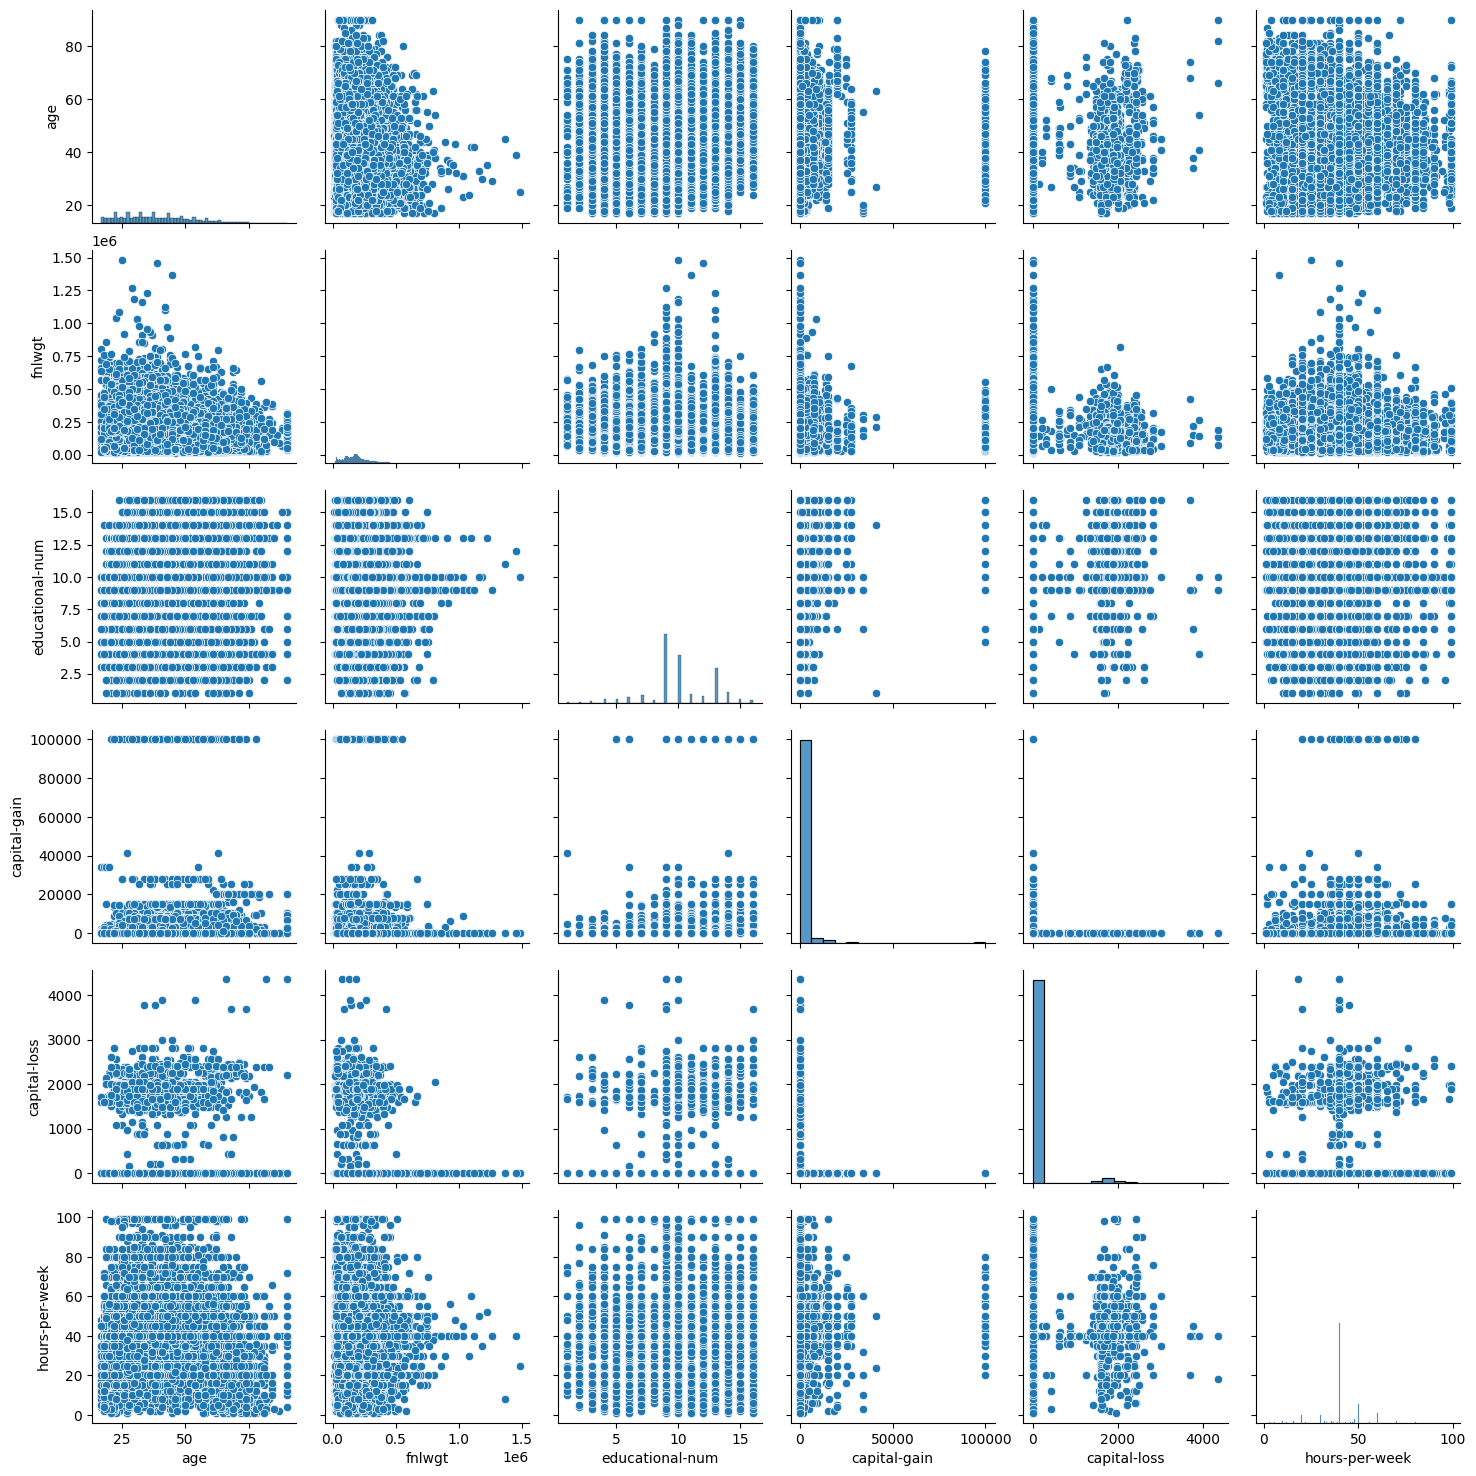

In [7]:
sns.pairplot(USAAdult)

<Axes: xlabel='income', ylabel='Count'>

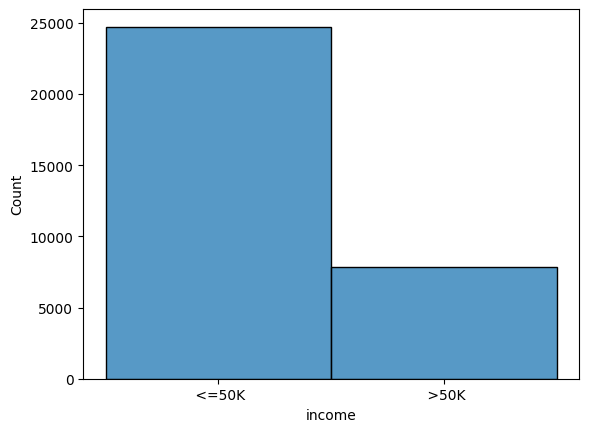

In [8]:
sns.histplot(USAAdult['income'])

<Axes: >

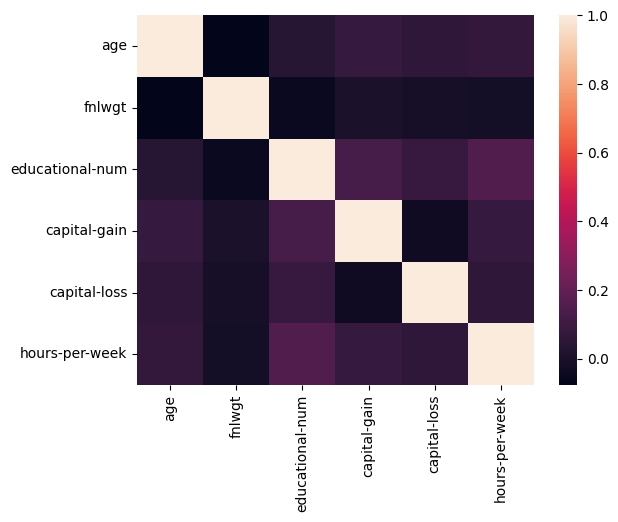

In [9]:
num_columns = USAAdult.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(USAAdult[num_columns].corr(),)

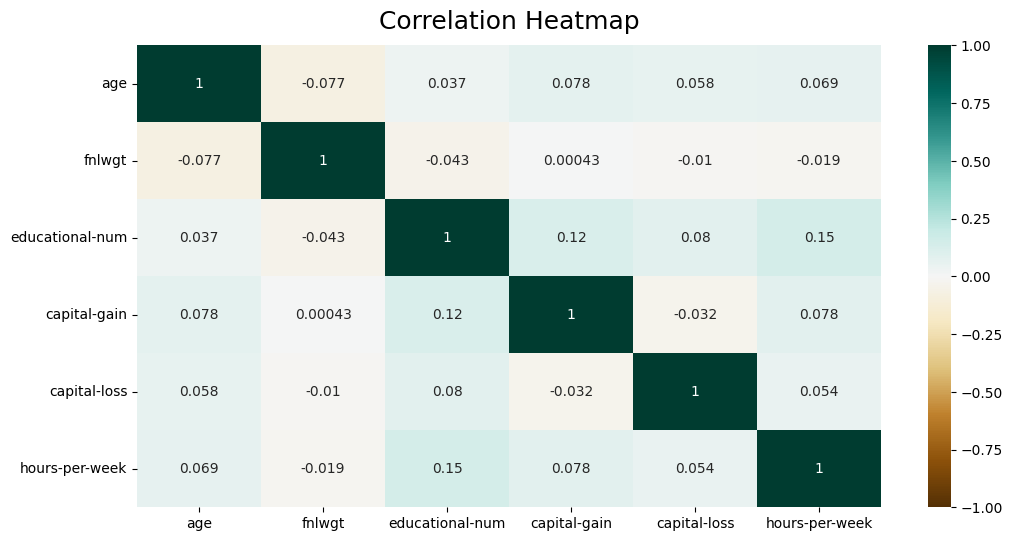

In [10]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(USAAdult[num_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Przygotowanie danych
### Czyszczenie danych

Usuwamy linie, które nie posiadają wartości

In [11]:
USAAdult.replace('?', np.nan, inplace=True)
USAAdult.dropna(inplace=True)

Przekształcamy dane na dane kategoryczne

In [12]:
USAAdult['income'] = USAAdult['income'].astype('category')
USAAdult['workclass'] = USAAdult['workclass'].astype('category')
USAAdult['education'] = USAAdult['education'].astype('category')
USAAdult['marital-status'] = USAAdult['marital-status'].astype('category')
USAAdult['relationship'] = USAAdult['relationship'].astype('category')
USAAdult['race'] = USAAdult['race'].astype('category')
USAAdult['gender'] = USAAdult['gender'].astype('category')
USAAdult['native-country'] = USAAdult['native-country'].astype('category')

Tworzymy nowe pole income_num w którym przechowujemy kategoryczną zmienną income jako wartości liczbowe:
$$
\text{income\_num}  = \left\{ 
\begin{array}{ll}
\text{1} & \text{dla } x > 50.000 \\
\text{0} & \text{dla } x \leq 50.000 \\
\end{array} 
\right.
$$

In [13]:
USAAdult['income'] = USAAdult['income'].str.strip()
USAAdult['income_num'] = USAAdult['income'].map({'<=50K': 0, '>50K': 1})
USAAdult['income_num'] = USAAdult['income_num'].astype('int64')

### Wybór cech

In [15]:
pd.set_option('display.max_rows', 15)
num_columns = USAAdult.select_dtypes(include=[np.number, np.bool_]).columns.tolist()
USAAdult[num_columns].corr()[['income_num']].sort_values(by='income_num', ascending=False)

,income_num
income_num,1.000000
educational-num,0.335154
age,0.234037
hours-per-week,0.229689
capital-gain,0.223329
capital-loss,0.150526
fnlwgt,-0.009463


Jak widać największy wpływ na dochód ma edukacja, wiek i ilość przepracowanych godzin. 

Następnie użyto formatu one-hot encoding aby stwierdzić czy warto dodać jakieś dodatkowe kolumny jako istotne.

In [16]:
pd.set_option('display.max_rows', 15)
categorical_columns = ['workclass', 'race', 'gender', 'native-country']
USAAdult1 = USAAdult
for column in categorical_columns:
    dummies = pd.get_dummies(USAAdult1[column], prefix=column)
    USAAdult1 = pd.concat([USAAdult1, dummies], axis=1)


In [17]:
pd.set_option('display.max_rows', 15)
num_columns = USAAdult1.select_dtypes(include=[np.number, np.bool_]).columns.tolist()
USAAdult1[num_columns].corr()[['income_num']].sort_values(by='income_num', ascending=False)

,income_num
income_num,1.000000
educational-num,0.335154
age,0.234037
hours-per-week,0.229689
capital-gain,0.223329
...,...
native-country_ Mexico,-0.062901
workclass_ ?,-0.078198
workclass_ Private,-0.078528
race_ Black,-0.089089


Na podstawie powyższych danych podjęto decyzję o dodaniu jeszcze dwóch dodatkowych pól: Gender i Workclass oraz o usunięcie fnlwgt i pozostałych pól kategorycznych.

In [18]:
categorical_columns = ['workclass', 'gender']
for column in categorical_columns:
    dummies = pd.get_dummies(USAAdult[column], prefix=column)
    USAAdult = pd.concat([USAAdult, dummies], axis=1)

num_columns = USAAdult.select_dtypes(include=[np.number, np.bool_]).columns.tolist()
USAAdult[num_columns].corr()[['income_num']].sort_values(by='income_num', ascending=False)
print()

Przekopiowanie istotnych do obliczeń pól do nowego DataFrame df

In [20]:
df = USAAdult

df = df.drop("fnlwgt", axis=1)
df = df.drop("education", axis=1)
df = df.drop("workclass", axis=1)
df = df.drop("gender", axis=1)
df = df.drop("marital-status", axis=1)
df = df.drop("occupation", axis=1)
df = df.drop("relationship", axis=1)
df = df.drop("race", axis=1)
df = df.drop("native-country", axis=1)
df = df.drop("income", axis=1)
print('')

Ostateczna struktura:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          32561 non-null  int64
 1   educational-num              32561 non-null  int64
 2   capital-gain                 32561 non-null  int64
 3   capital-loss                 32561 non-null  int64
 4   hours-per-week               32561 non-null  int64
 5   income_num                   32561 non-null  int64
 6   workclass_ ?                 32561 non-null  bool 
 7   workclass_ Federal-gov       32561 non-null  bool 
 8   workclass_ Local-gov         32561 non-null  bool 
 9   workclass_ Never-worked      32561 non-null  bool 
 10  workclass_ Private           32561 non-null  bool 
 11  workclass_ Self-emp-inc      32561 non-null  bool 
 12  workclass_ Self-emp-not-inc  32561 non-null  bool 
 13  workclass_ State-gov         32561 non-null  b

## Tworzenie modelu i ocena algorytmów
### Lasy losowe

In [22]:
x = df.drop("income_num", axis="columns")
y = df["income_num"]

x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                                                      test_size=0.2,
                                                      stratify=y, 
                                                      random_state=0)

In [67]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)
preds = model.predict(x_valid)

Poniżej następuje próba tuningu modelu z następującymi parametrami do tuningu max_depth, min_samples_leaf, n_estimators.

In [64]:
def get_result_for(max_depth:int, min_leaf:int, n_est:int):
    model = RandomForestClassifier(n_jobs=-1, max_depth=max_depth, min_samples_leaf=min_leaf, n_estimators=n_est)
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    print(f"m:{max_depth}, mn:{min_leaf}, ne:{n_est} - {accuracy_score(y_valid, preds)*100} {balanced_accuracy_score(y_valid, preds)*100} {f1_score(y_valid, preds)*100}")

for max_depth in range(30,70,10):
    for cmin_leaf in range(1,5):
        for n_est in range(600,1400,200):
            get_result_for(max_depth, cmin_leaf, n_est)

m:30, mn:1, ne:600 - 82.31229847996315 72.23723715977796 58.97435897435898
m:30, mn:1, ne:800 - 82.48119146322739 72.32668408617238 59.177101967799636
m:30, mn:1, ne:1000 - 82.23552894211576 72.03424532097975 58.6638085030368
m:30, mn:1, ne:1200 - 82.2815906648242 72.23879124450589 58.961593172119485
m:30, mn:2, ne:600 - 84.07799785045295 73.13870947772436 61.146496815286625
m:30, mn:2, ne:800 - 83.95516658989712 72.86183090526403 60.699511094396385
m:30, mn:2, ne:1000 - 84.09335175802242 72.99638497967437 60.96458176337604
m:30, mn:2, ne:1200 - 83.97052049746661 72.89371866036606 60.75187969924812
m:30, mn:3, ne:600 - 84.15476738830033 72.7319584304905 60.64073226544623
m:30, mn:3, ne:800 - 84.21618301857822 72.68529719774664 60.61302681992338
m:30, mn:3, ne:1000 - 84.30830646399508 72.85484719671489 60.90283091048202
m:30, mn:3, ne:1200 - 84.18547520343928 72.73040434576257 60.65699006875478
m:30, mn:4, ne:600 - 84.35436818670352 72.64563901900497 60.641174198532255
m:30, mn:4, ne:80

Jak widać poniższa wariacja poprawia wyniki predykcji o kilka procent.
m:60, mn:2, ne:1000 - 84.1087056655919 73.09360232970843 61.10484780157835

Poniżej model z już ustawionymi wartościami

In [70]:
model = RandomForestClassifier(n_jobs=-1, max_depth=60, min_samples_leaf=2, n_estimators=1000)
model.fit(x_train, y_train)
preds = model.predict(x_valid)

Accuracy: 83.97052049746661
Balanced accuracy:  72.89371866036606
F1 score:  60.75187969924812


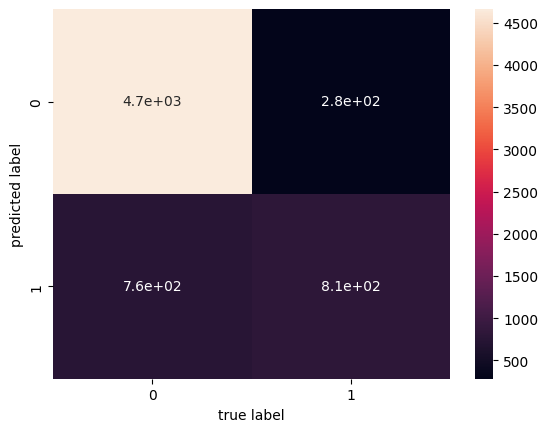

In [74]:
print("Accuracy:", accuracy_score(y_valid, preds)*100)
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds)*100)
print("F1 score: ", f1_score(y_valid, preds)*100)

cm = confusion_matrix(y_valid, preds)
sns.heatmap(cm, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
results = pd.DataFrame({
    'Rzeczywiste etykiety': y_valid,
    'Przewidywane etykiety': preds
})
pd.set_option('display.max_rows', 20)
results.sample(20)

,Rzeczywiste etykiety,Przewidywane etykiety
8231,0,0
22365,0,0
10611,0,0
4330,1,0
603,0,0
16905,0,0
29693,0,0
19816,0,0
28766,0,0
20552,1,1


Gradient Boosting Classifier

In [58]:
model_xgb = XGBClassifier(objective='binary:logistic', n_jobs=-1, eval_metric='logloss', use_label_encoder=False)
model_xgb.fit(x_train, y_train)
preds_xgb = model_xgb.predict(x_valid)

Poniżej następuje próba tuningu modelu

In [63]:
def get_result_xgb(max_depth:int, learning_rate:float, subsample:float):
    model_xgb = XGBClassifier(objective='binary:logistic', n_jobs=-1, eval_metric='logloss', use_label_encoder=False, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample)
    model_xgb.fit(x_train, y_train)
    preds_xgb = model_xgb.predict(x_valid)
    print(f"m:{max_depth}, lr:{learning_rate}, ss:{subsample} - {accuracy_score(y_valid, preds_xgb)*100} {balanced_accuracy_score(y_valid, preds_xgb)*100} {f1_score(y_valid, preds_xgb)*100}")

for max_depth in range(4,7):
    for learning_rate in range(1,5):
        for subsample in range(6,9):
            get_result_xgb(max_depth, learning_rate/10.0, subsample/10.0)

m:4, lr:0.1, ss:0.6 - 85.02994011976048 73.59139307897071 62.369741412582016
m:4, lr:0.1, ss:0.7 - 84.84569322892676 73.33939920761024 61.90659976842918
m:4, lr:0.1, ss:0.8 - 84.87640104406572 73.20718593301831 61.74757281553398
m:4, lr:0.2, ss:0.6 - 85.19883310302473 74.42124208126121 63.567649281935005
m:4, lr:0.2, ss:0.7 - 85.27560264087211 74.60245738841542 63.852242744063325
m:4, lr:0.2, ss:0.8 - 85.06064793489944 74.00359309547883 62.93333333333333
m:4, lr:0.3, ss:0.6 - 85.2141870105942 74.54023596293928 63.72881355932203
m:4, lr:0.3, ss:0.7 - 85.18347919545525 74.14981247807515 63.21006481128478
m:4, lr:0.3, ss:0.8 - 85.36772608628897 74.88089004560368 64.26696662917135
m:4, lr:0.4, ss:0.6 - 85.29095654844157 74.61256861187347 63.87631975867269
m:4, lr:0.4, ss:0.7 - 85.2141870105942 74.60556555787127 63.81059751972943
m:4, lr:0.4, ss:0.8 - 85.36772608628897 74.44535941272363 63.72287780738485
m:5, lr:0.1, ss:0.6 - 85.09135575003839 73.89315635253091 62.81118345461509
m:5, lr:0.1

Niestety zmiany max_depth, learning_rate, subsample niewiele zmieniają.

Accuracy: 85.38307999385843
Balanced accuracy:  74.7167890159097
F1 score:  64.0754716981132


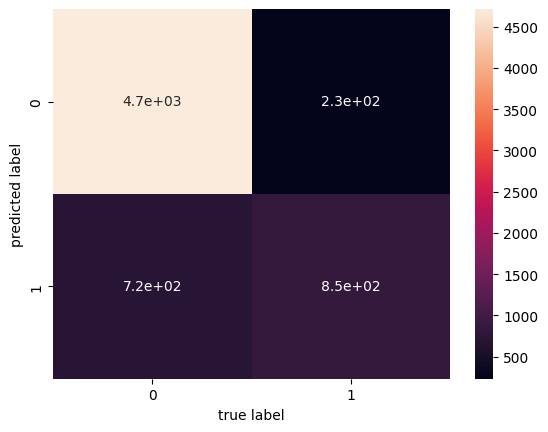

In [59]:
print("Accuracy:", accuracy_score(y_valid, preds_xgb)*100)
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds_xgb)*100)
print("F1 score: ", f1_score(y_valid, preds_xgb)*100)

cm = confusion_matrix(y_valid, preds_xgb)
sns.heatmap(cm, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [55]:
results = pd.DataFrame({
    'Rzeczywiste etykiety': y_valid,
    'Przewidywane etykiety': preds
})
pd.set_option('display.max_rows', 20)
results.sample(20)

,Rzeczywiste etykiety,Przewidywane etykiety
6315,0,0
5734,0,0
10900,0,1
6815,0,0
9584,0,0
24960,0,0
12504,1,0
19446,0,0
4805,1,1
2672,0,1


Sprawdźmy zbalansowanie wyników

In [77]:
USAAdult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Jak widać wyniki nie są zbalansowane. Wierszy skupiających się na osobach zarabiających mniej niż 50.000 jest ponad trzykrotnie więcej.
Dlatego ważniejszymi metrykami powinny być F1 i zbalansowana dokładność. 

### Podsumowanie wyników
W celu przeanalizowania wyników, przyjrzyjmy się dokładnie najważniejszych z metryk:

#### Balanced Accuracy
- **Random Forest:** 72.89%
- **XGBoost:** 74.72% 

Tutaj także niewielka przewaga po stronie XGBoosta. Osiąga on nieco lepsze wyniki również w zakresie balansowanej dokładności, co oznacza lepsze radzenie sobie z obiema klasami wynikowymi, co jest kluczowe w przypadku nierównomiernego rozkładu klas.

#### F1 Score
- **Random Forest:** 60.75%
- **XGBoost:** 64.08%

XGBoost wykazuje lepsze wyniki także w zakresie F1 score, co sugeruje, że jest bardziej skuteczny w balansowaniu między precyzją a czułością.

#### Confusion Matrix
- **Random Forest:** 
  - TP: 808
  - FP: 284
  - TN: 4661
  - FN: 760
- **XGGB:** 
  - TP: 849
  - FP: 233
  - TN: 4712
  - FN: 719

XGBoost ma mniejszą liczbę fałszywych pozytywnych (FP) i fałszywych negatywnych (FN) niż Random Forest. Wyniki ma lepsze w każdym czynniku, co pokazuje, że XGBoost lepiej identyfikuje klasy pozytywne i negatywne.

#### Wnioski:
XGBoost wypada lepiej pod każdym względem w porównaniu z Random Forest w tym zestawie danych. Wykazuje wyższą ogólną skuteczność, lepsze zarządzanie nierównomiernym rozkładem klas oraz efektywniej radzi sobie z identyfikacją rzadszych przypadków. Biorąc pod uwagę wszystkie te aspekty, można uznać XGBoost za bardziej odpowiedni model do tego zadania.